This notebook contains all the exploration steps taken during the **Adidas Data Science Case Study**, which are listed as follows:<br><br>
1) Preliminary Exploration<br><br>
2) Sales Forecasting<br>
1. Inidividual
2. Total<br>

3) Feature Importance

PS: As the main purpose of the case study is to conduct precise sales forecasting (on **individual article level as well as total sales**) and to spot out the main drivers of sales, we will concentrate mainly on the data from the file: **sales.txt**. Some preliminary and brief analysis will be done for the article attributes to visualize which attributes play a big role for the sales of articles. However, when we are to predict the individual articles' sales performance, it won't make any major differences when we build models on article level, unless we group the articles into clusters and try to exploit the intrinsic trends that are exhibited for different trends. This could be accomplished in future when more data for many more articles is available. Combining the learned information about the clusters with the individual articles' temporal characteristics, much more accurate predictive models would be possible. Momentarily, as we only have access to attribute information for less than 500 articles, the attribute information will be not taken into consideration during the prediction model (on article level) building process.

# 1. Preliminary Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

1) Load the data:

In [2]:
sales = pd.read_csv('sales.txt', delimiter=';')
attributes = pd.read_csv('article_attributes.txt', delimiter=';')

2) Take a first look at the data:

In [3]:
sales.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2
0,Germany,AA1821,62,31.95,25.95,0.812207,2014-12-28,1,0
1,Germany,AA1821,29,31.95,22.95,0.718310,2015-01-04,0,0
2,Germany,AA1821,58,31.95,28.95,0.906103,2015-01-11,0,0
3,Germany,AA1821,49,31.95,29.95,0.937402,2015-01-18,0,0
4,Germany,AA1821,883,31.95,24.95,0.780908,2015-01-25,0,0


In [4]:
attributes.head()

,article,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col
0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255
1,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255
2,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255
3,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238
4,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238


In [5]:
sales.shape

(81426, 9)

In [6]:
attributes.shape

(476, 13)

3) Check if there are missing values in the columns:

In [7]:
for col in sales.columns:
    print col+': '+str(sales[col].isnull().sum())

country: 0
article: 0
sales: 0
regular_price: 0
current_price: 0
ratio: 0
retailweek: 0
promo1: 0
promo2: 0


In [8]:
for col in attributes.columns:
    print col+': '+str(attributes[col].isnull().sum())

article: 0
productgroup: 0
category: 0
cost: 0
style: 0
sizes: 0
gender: 0
rgb_r_main_col: 0
rgb_g_main_col: 0
rgb_b_main_col: 0
rgb_r_sec_col: 0
rgb_g_sec_col: 0
rgb_b_sec_col: 0


4) See how many unique values there are for each columns in sales and attribute:

In [9]:
for col in sales.columns:
    print col+': '+str(len(sales[col].unique()))

country: 3
article: 477
sales: 785
regular_price: 123
current_price: 174
ratio: 5154
retailweek: 123
promo1: 2
promo2: 2


In [10]:
for col in attributes.columns:
    print col+': '+str(len(attributes[col].unique()))

article: 476
productgroup: 6
category: 21
cost: 118
style: 3
sizes: 8
gender: 4
rgb_r_main_col: 49
rgb_g_main_col: 75
rgb_b_main_col: 65
rgb_r_sec_col: 49
rgb_g_sec_col: 75
rgb_b_sec_col: 65


The results above tell us that there are only information about 476 articles in the attribute table where as we have sales history information for 477 articles.

5) Summarize the sales dataframe

In [11]:
sales.describe([.1,.2,.3,.6,.7,.8,.9,.95,.98,.99,.999])

,sales,regular_price,current_price,ratio,promo1,promo2
count,81426.000000,81426.000000,81426.000000,81426.000000,81426.000000,81426.000000
mean,57.048375,52.620695,28.356811,0.544464,0.065041,0.005060
std,88.506045,35.549601,22.704746,0.192692,0.246599,0.070953
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000
10%,4.000000,14.950000,6.950000,0.308143,0.000000,0.000000
20%,8.000000,23.950000,9.950000,0.331942,0.000000,0.000000
30%,12.000000,27.950000,13.950000,0.393020,0.000000,0.000000
50%,26.000000,41.450000,20.950000,0.523526,0.000000,0.000000
60%,37.000000,53.950000,26.950000,0.592404,0.000000,0.000000
70%,53.000000,65.950000,32.950000,0.663866,0.000000,0.000000


6) As we are looking to predict the future sales, let us take a closer look at this feature next:

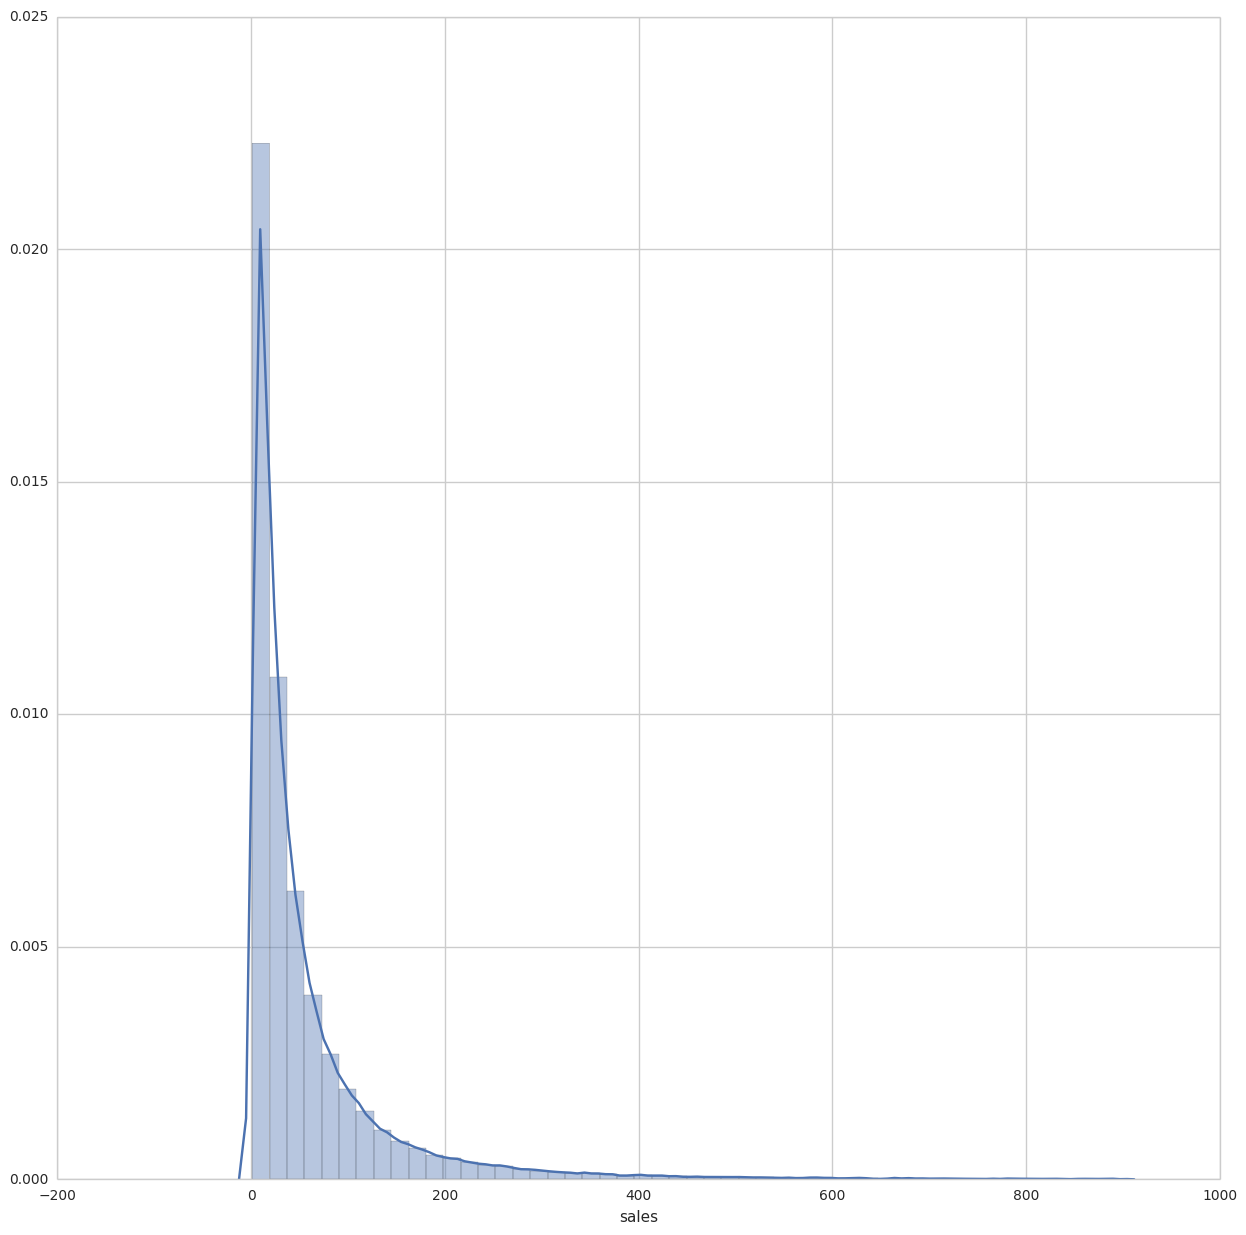

In [12]:
# plot the histogram for sales
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

sns.distplot(sales['sales'])

In [13]:
# group by date and get average sales, and precent change
average_sales    = sales.groupby('retailweek')["sales"].mean()
pct_change_sales = sales.groupby('retailweek')["sales"].sum().pct_change()

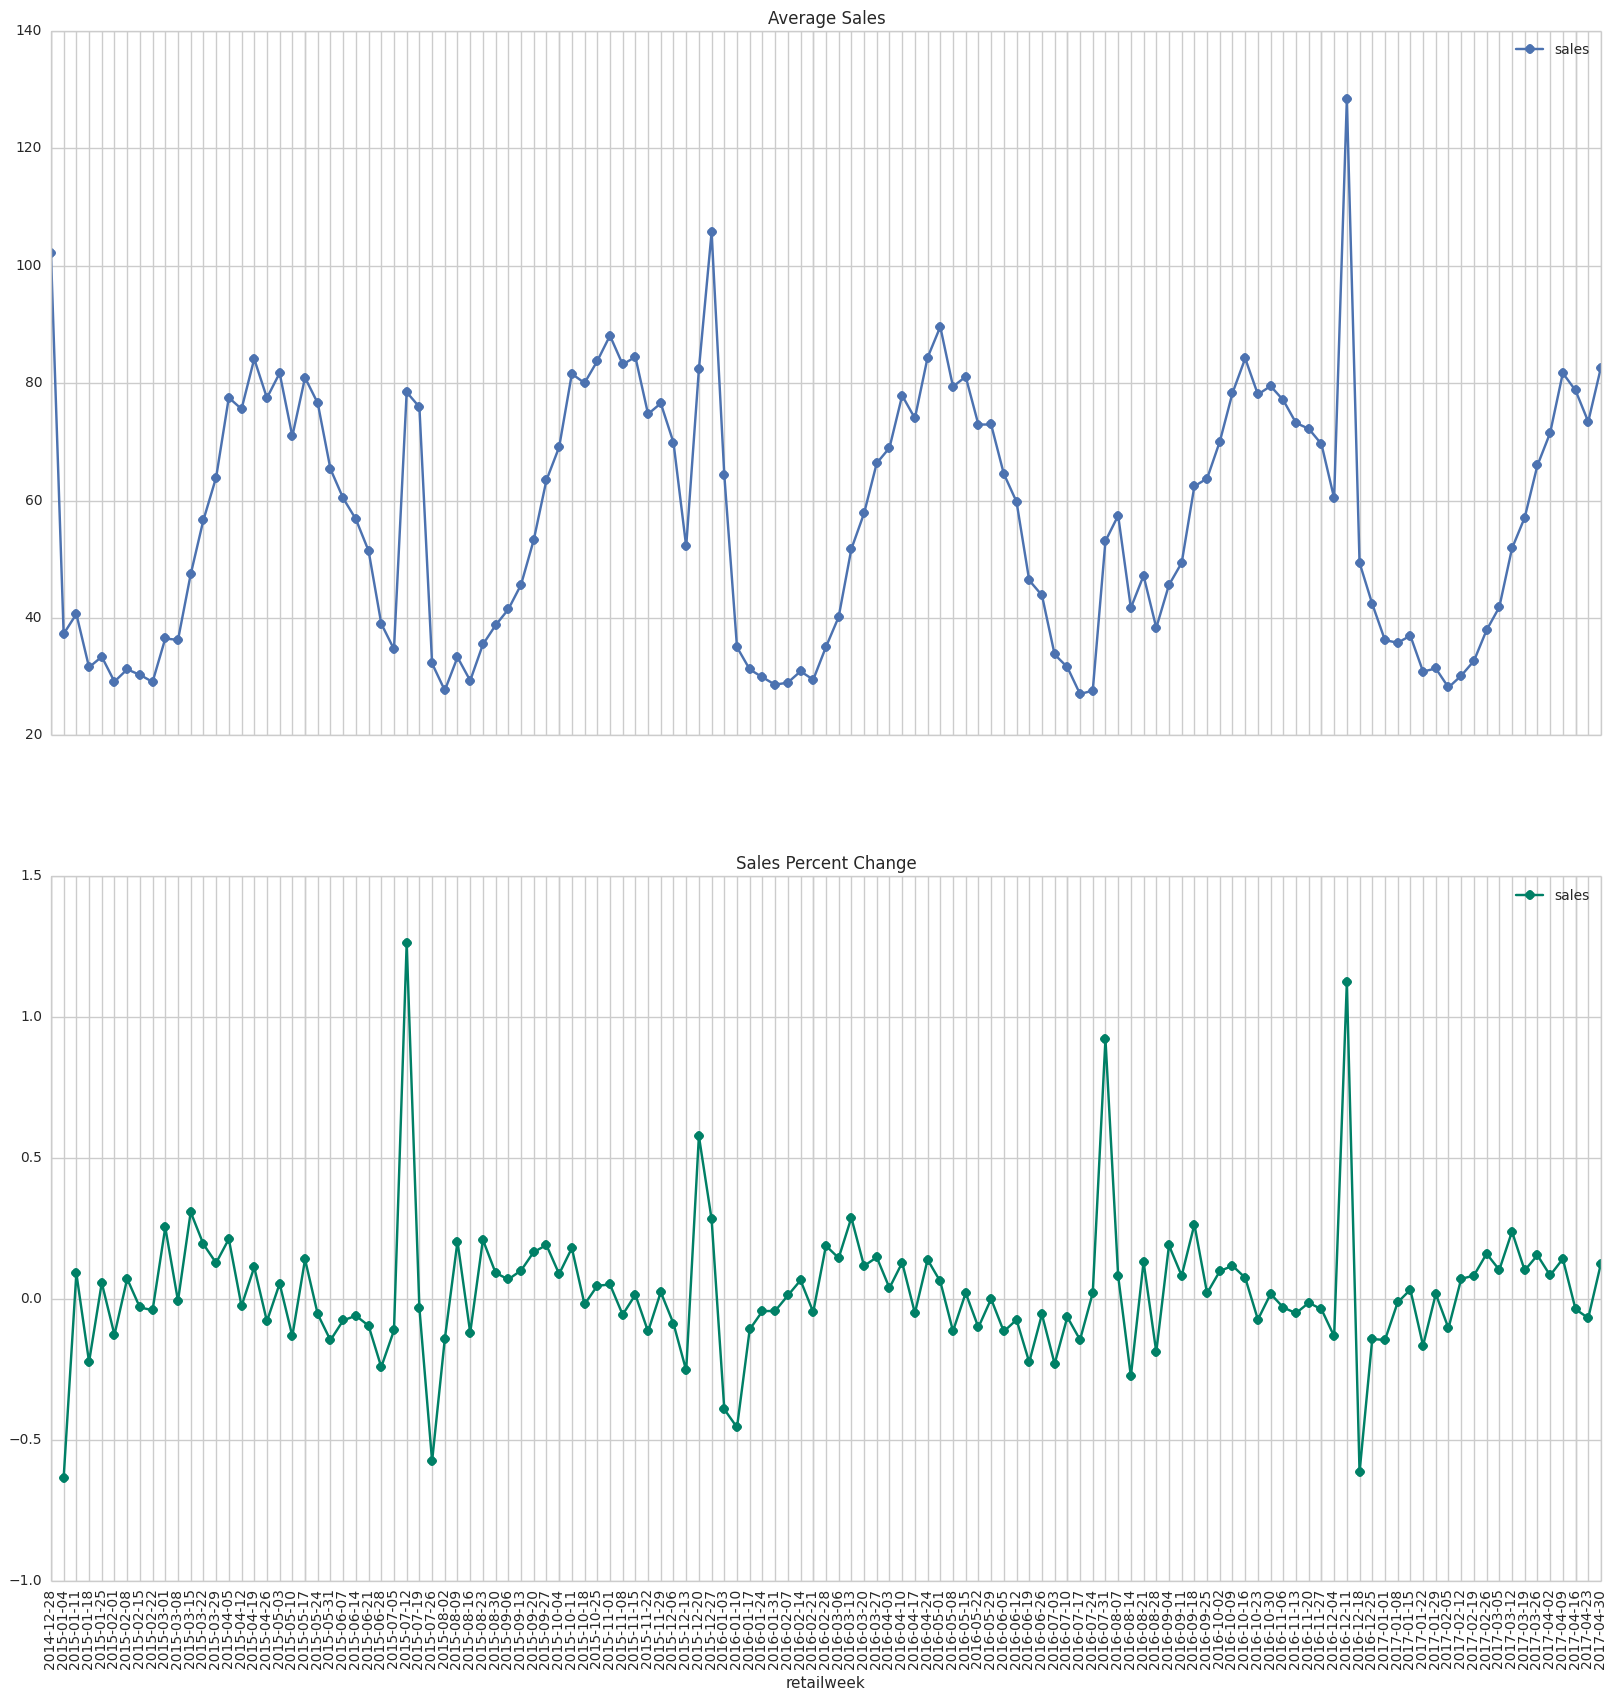

In [14]:
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(20, 20))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)
# plt.tight_layout()

From the plot above we see that there are **strong signs of yearly seasonality** for the average sales.

7) To continue investigating the temporal characteristics of the column ['sales']:

In [15]:
# create year, month and day columns
sales['year']  = sales['retailweek'].apply(lambda x: int(str(x)[:4]))
sales['month'] = sales['retailweek'].apply(lambda x: int(str(x)[5:7]))
sales['day'] = sales['retailweek'].apply(lambda x: int(str(x)[8:]))

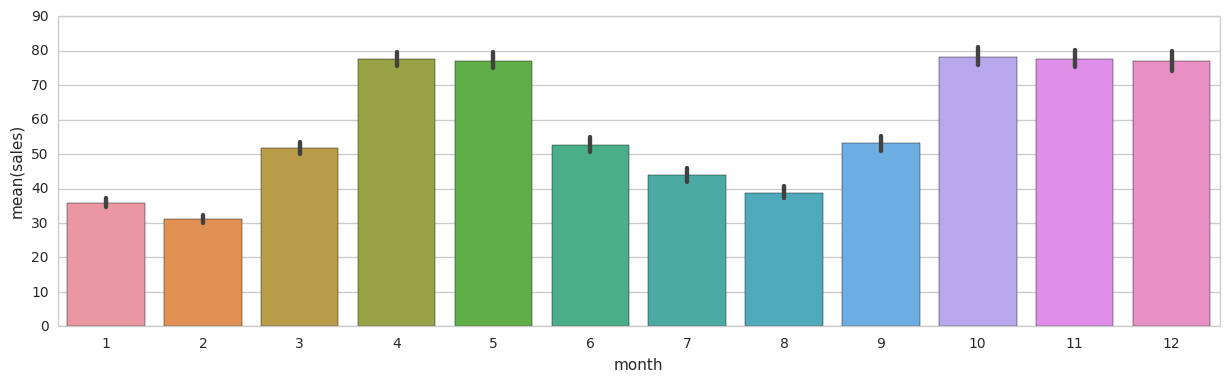

In [16]:
# plot the average sales for each month in the year
fig, axis = plt.subplots(1,1,figsize=(15,4))

sns.barplot(x='month', y='sales', data=sales, order=range(1, 13), ax=axis)

# won't plot the same for the yearly averages, as there are only 4 years available, 
# in which 2014 contains only one day of data, 2017 only the first 5 months 
# (therefore not a comprehensive yearly indicator).

The graph above shows that most sales happen in April, May, October, November and December.

8) Now turn to the two types of promotions:

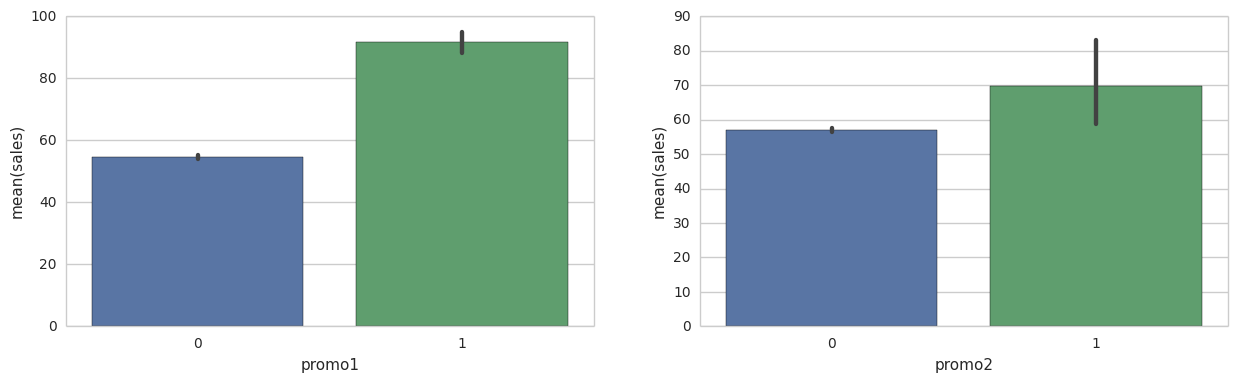

In [17]:
# plot average sales with/without promo1/promo2
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='promo1', y='sales', data=sales, ax=axis1)
sns.barplot(x='promo2', y='sales', data=sales, ax=axis2)

The plots above **seem** to indicate that **promo1 has a stronger impact on sales than promo2 does**. We will check in further detail later on during the forecasting model building process.

9) Now to see how the three countries are doing in terms of sales:

In [18]:
# group by date and get average sales (per country)
average_sales_DE = sales[sales['country']=='Germany'].groupby('retailweek')["sales"].mean()
average_sales_FR = sales[sales['country']=='France'].groupby('retailweek')["sales"].mean()
average_sales_AT = sales[sales['country']=='Austria'].groupby('retailweek')["sales"].mean()

average_sales_DE = average_sales_DE.to_frame()
average_sales_DE = average_sales_DE.merge(average_sales_FR.to_frame(), left_index=True, right_index=True)
average_sales_DE = average_sales_DE.merge(average_sales_AT.to_frame(), left_index=True, right_index=True)

average_sales_DE.columns = ['sales_DE', 'sales_FR', 'sales_AT']

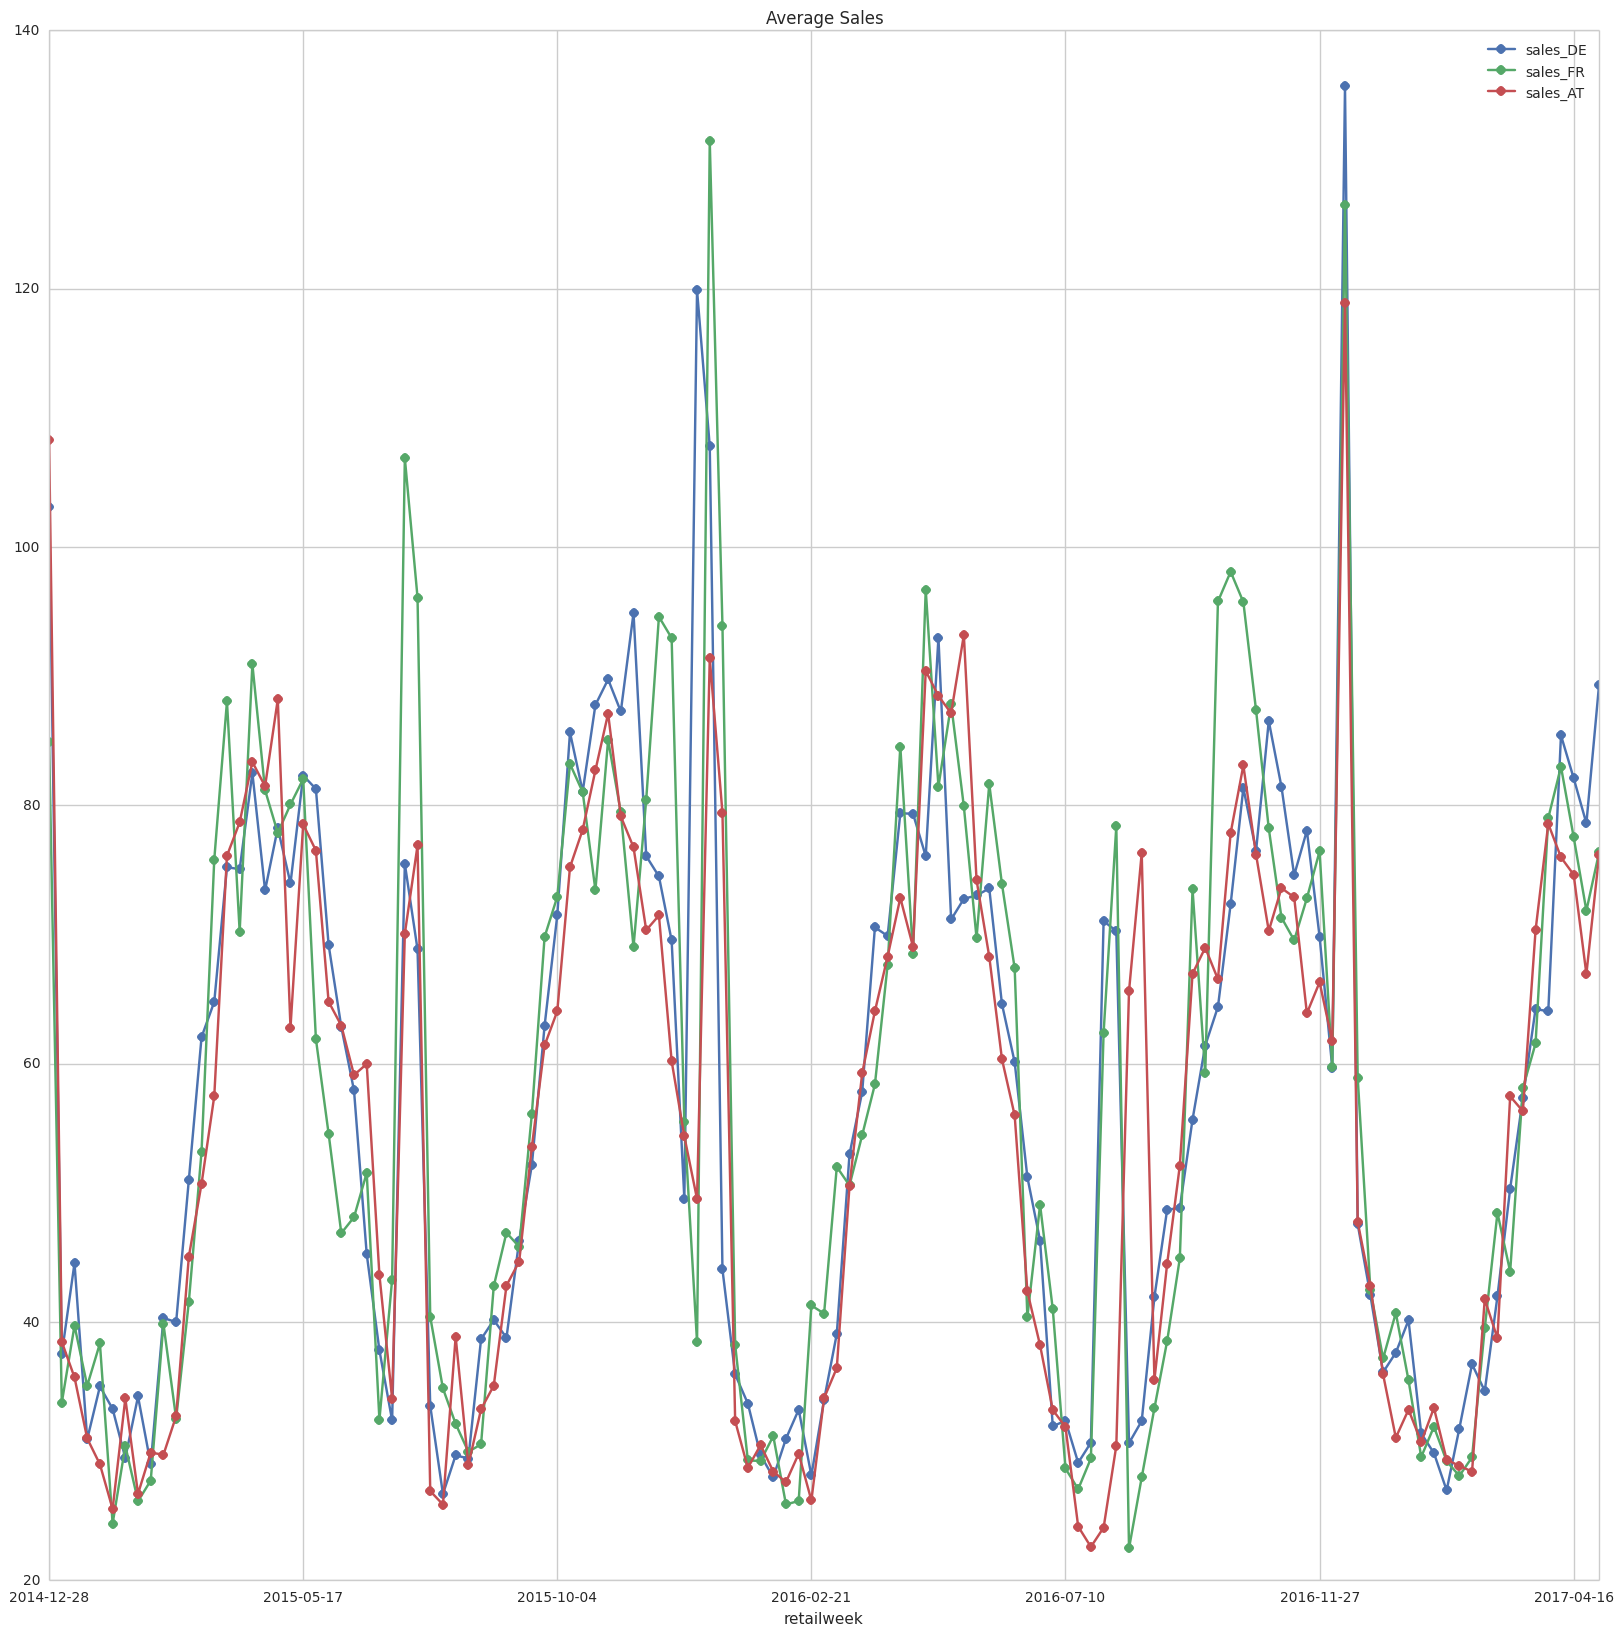

In [19]:
fig, axis = plt.subplots(1,1,sharex=True,figsize=(20, 20))
average_sales_DE.plot(legend=True,ax=axis,marker='o',title="Average Sales")

The time series above show that there are still strong signs of seasonality in each country and the sales in the three countries seem to be quite correlated.

10) Next we look at the relation between current/regular price ratio and sales:

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


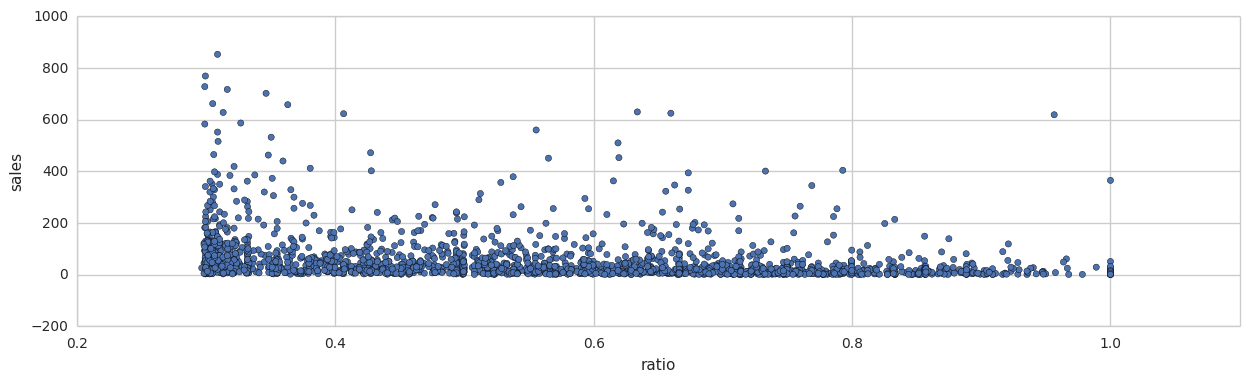

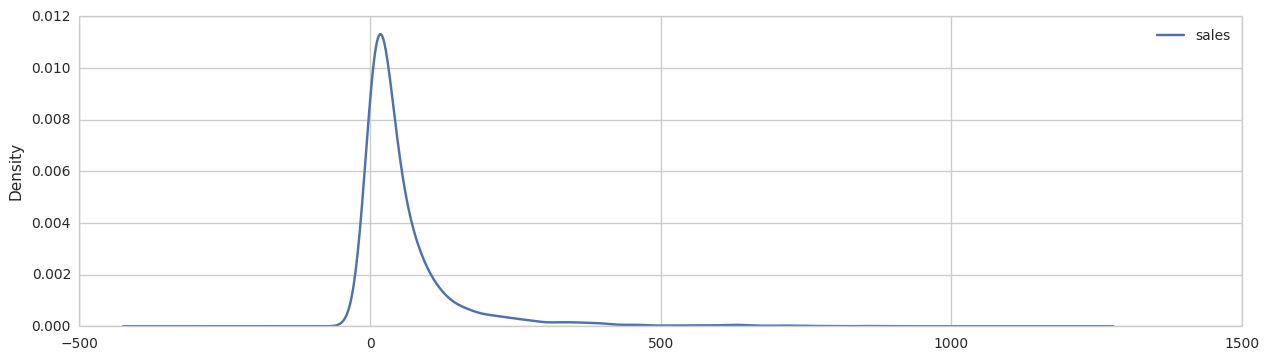

In [20]:
# select only a fraction in the sales dataset to avoid too much overlapping in the visualization.
sample_sales = sales.sample(n=2000)

# plot ratio vs sales
sample_sales.plot(kind='scatter',x='ratio',y='sales',figsize=(15,4))
sample_sales.plot(kind='kde',x='ratio',y='sales',figsize=(15,4))

The figures above tell us that, **in general, more articles will be sold when ratio is lower (higher discount).**

11) Afterwards, we briefly turn our attention to the attributes of the articles:

In [21]:
# join the two dataframes
data_merged = pd.merge(sales, attributes, on='article')

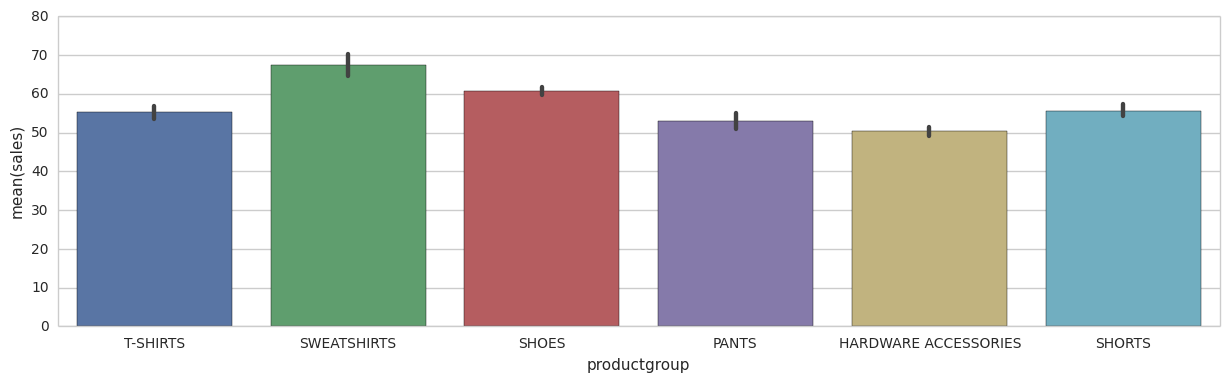

In [31]:
# plot the average sales for each product group
fig, axis = plt.subplots(1,1,figsize=(15,4))

sns.barplot(x='productgroup', y='sales', data=data_merged, order=data_merged['productgroup'].unique(), ax=axis)

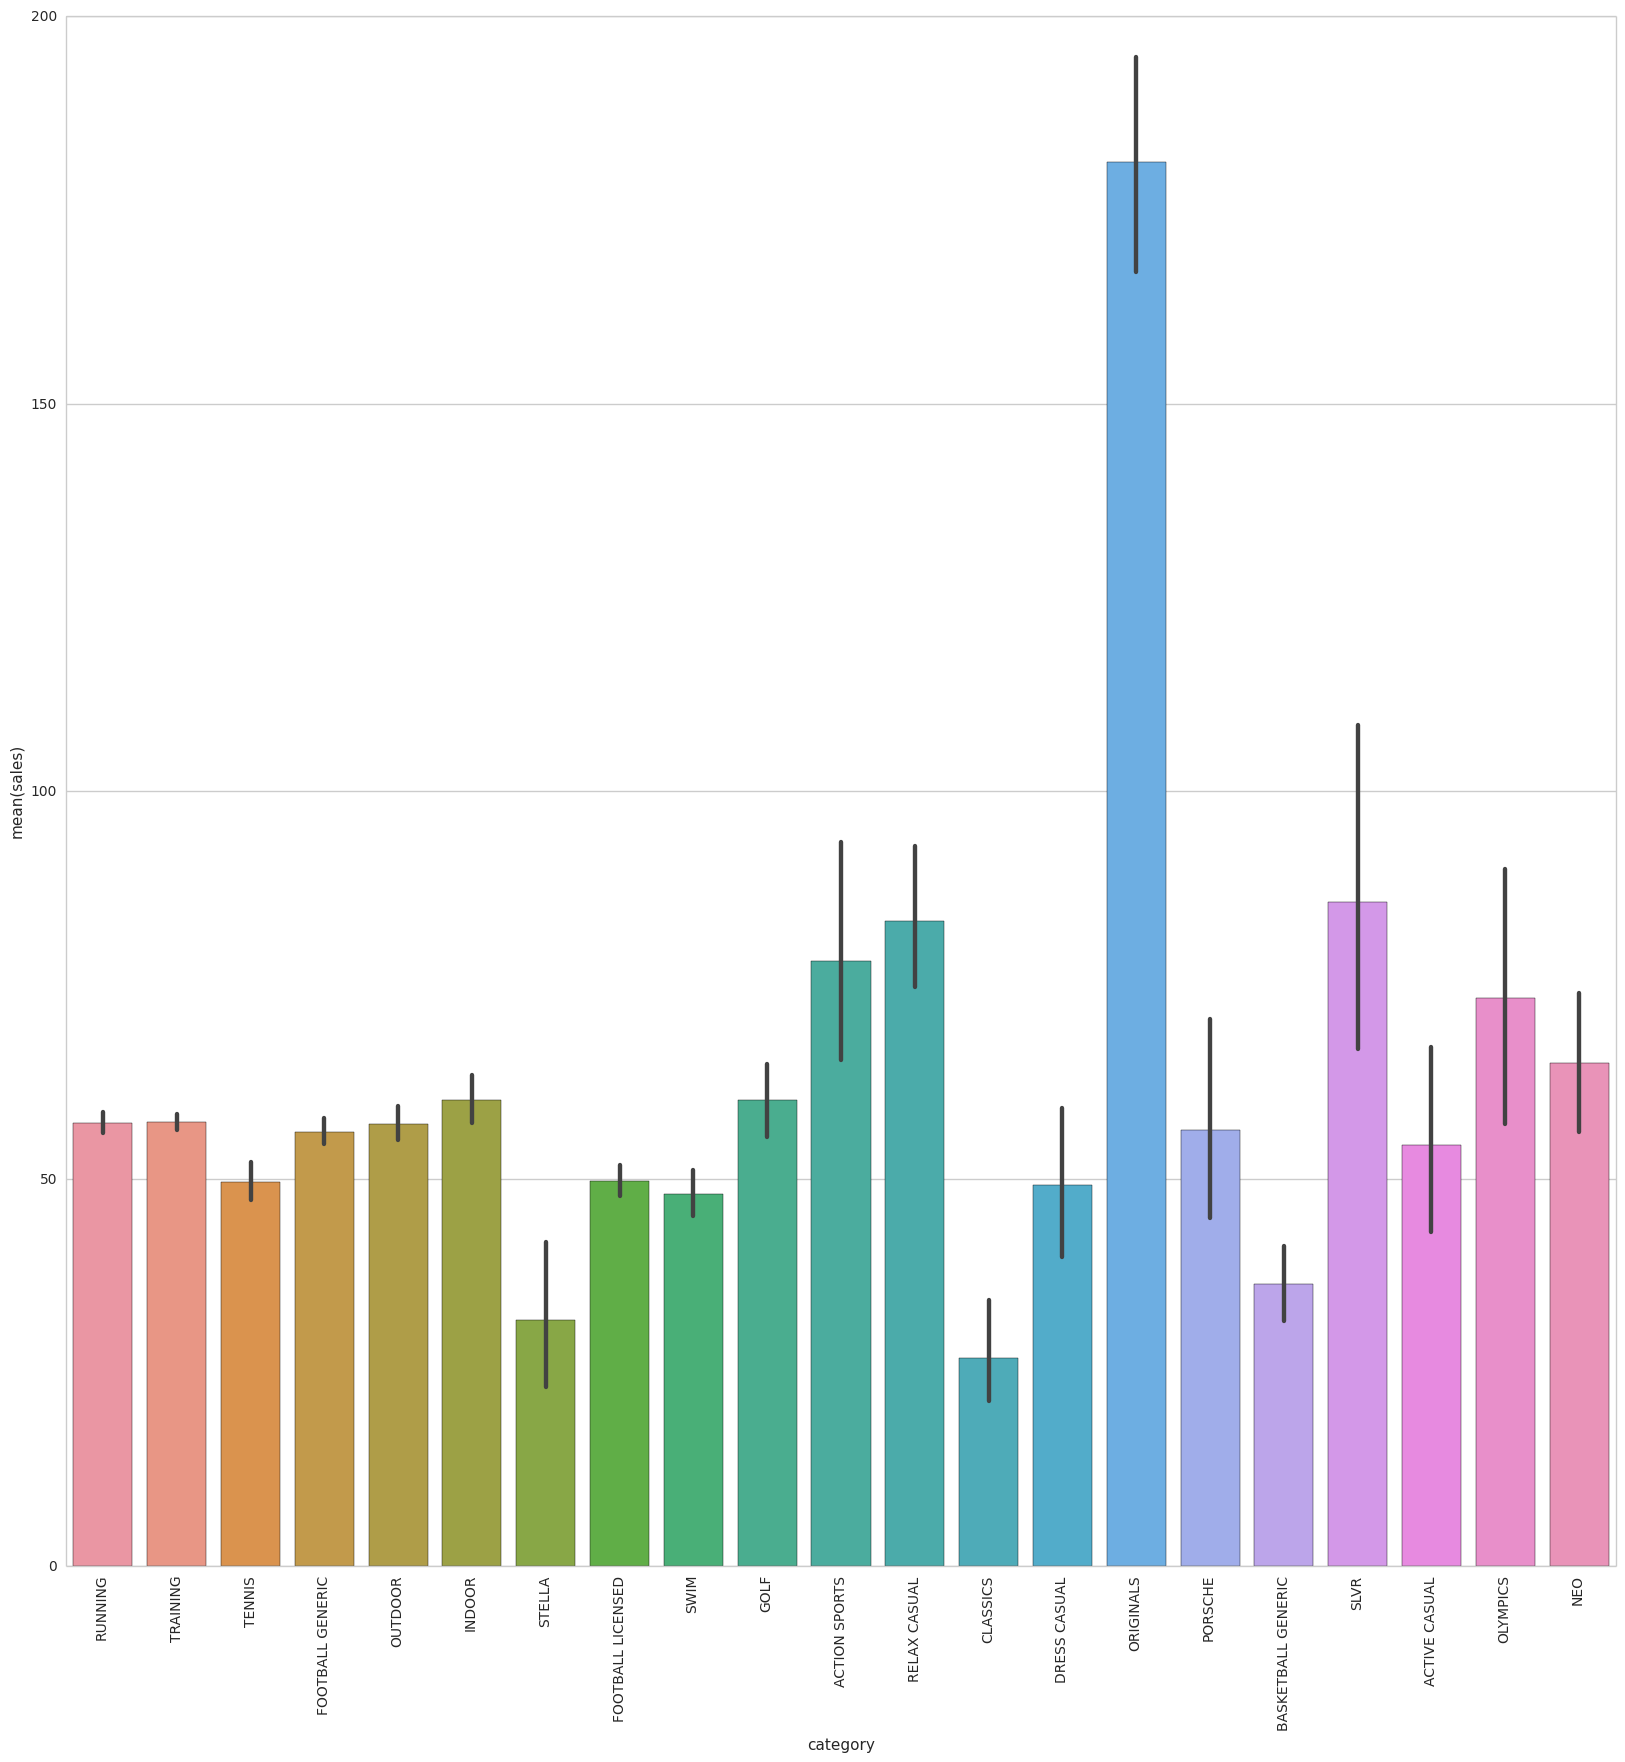

In [43]:
# plot the average sales for each category
fig, axis = plt.subplots(1,1,figsize=(20,20))

sns.barplot(x='category', y='sales', data=data_merged, order=data_merged['category'].unique(), ax=axis)
axis.set_xticks(range(len(data_merged['category'].unique())))
axis.set_xticklabels(data_merged['category'].unique(), rotation=90)
# plt.tight_layout()

Looks like Originals have been having the best performance during the investigated time period.

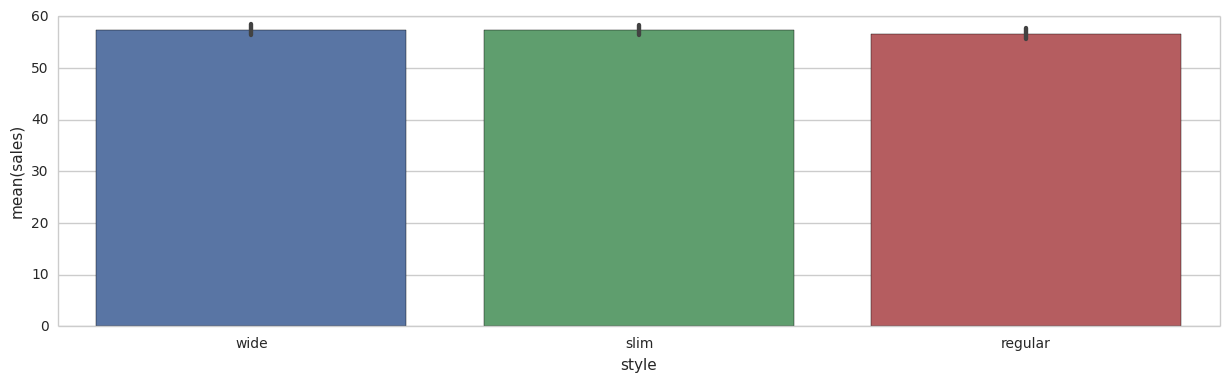

In [40]:
# plot the average sales for each style
fig, axis = plt.subplots(1,1,figsize=(15,4))

sns.barplot(x='style', y='sales', data=data_merged, order=data_merged['style'].unique(), ax=axis)
# plt.tight_layout()

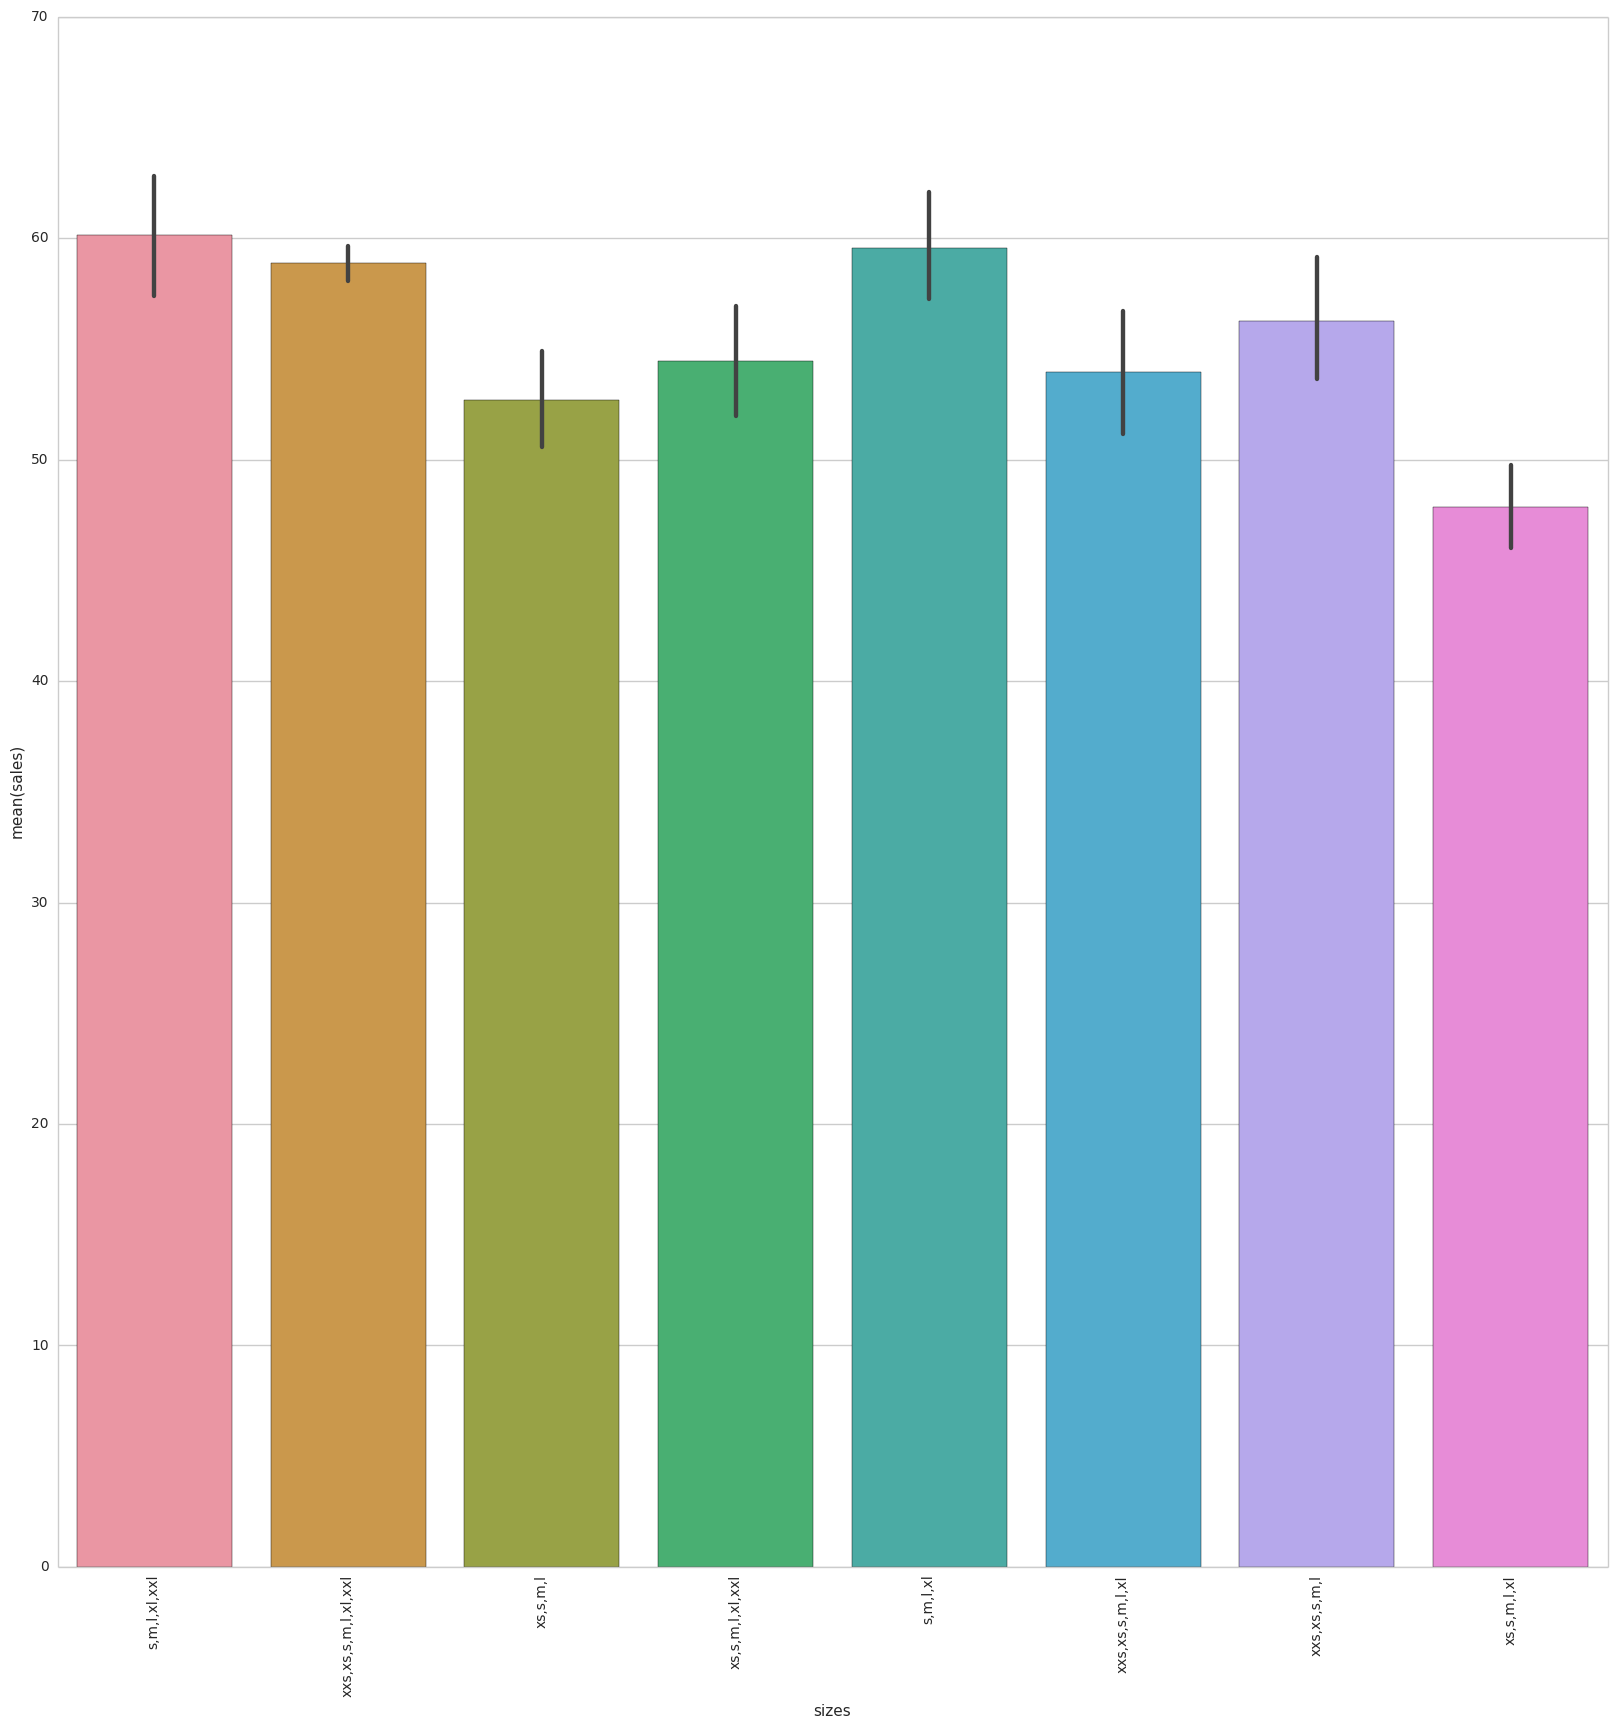

In [44]:
# plot the average sales for each size
fig, axis = plt.subplots(1,1,figsize=(20,20))

sns.barplot(x='sizes', y='sales', data=data_merged, order=data_merged['sizes'].unique(), ax=axis)
axis.set_xticks(range(len(data_merged['sizes'].unique())))
axis.set_xticklabels(data_merged['sizes'].unique(), rotation=90)

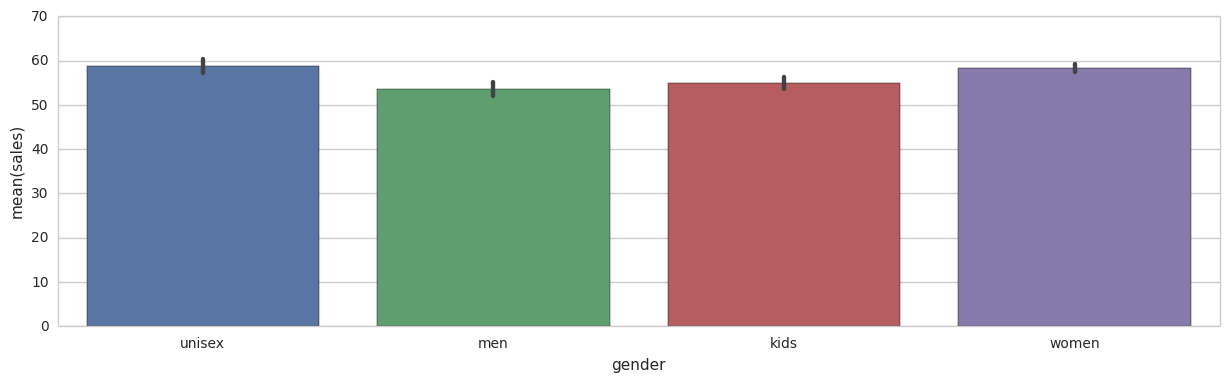

In [45]:
# plot the average sales for each gender
fig, axis = plt.subplots(1,1,figsize=(15,4))

sns.barplot(x='gender', y='sales', data=data_merged, order=data_merged['gender'].unique(), ax=axis)
# plt.tight_layout()

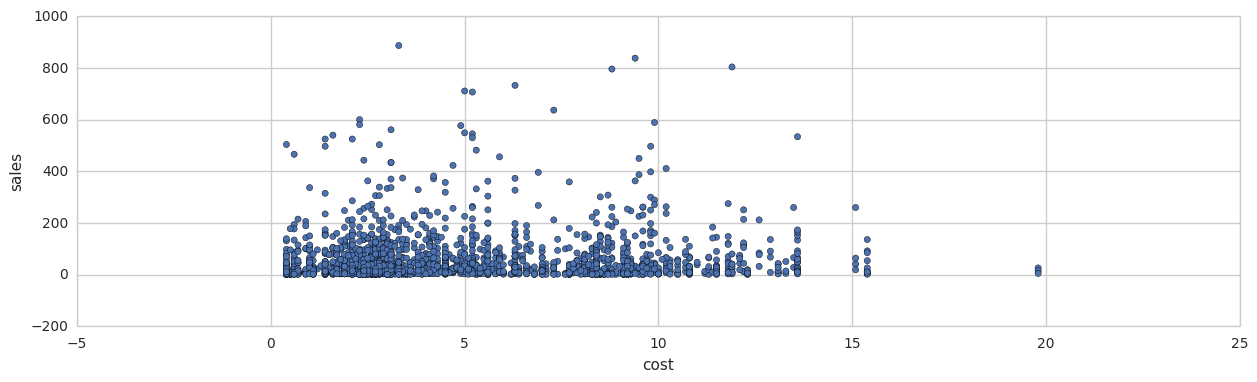

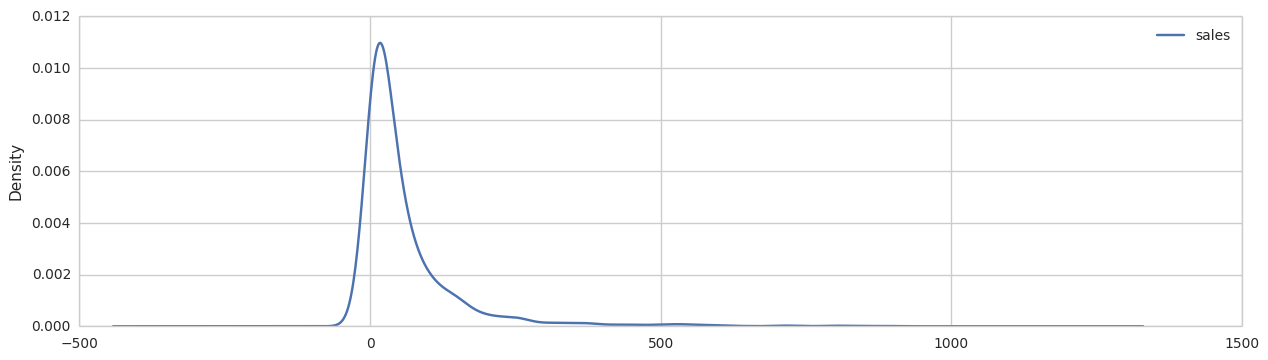

In [46]:
# select only a fraction in the merged dataset to avoid too much overlapping in the visualization.
sample_data_merged = data_merged.sample(n=2000)

# plot cost vs sales
sample_data_merged.plot(kind='scatter',x='cost',y='sales',figsize=(15,4))
sample_data_merged.plot(kind='kde',x='cost',y='sales',figsize=(15,4))

The figures above indicates that no distinctive correlation can be detected between cost and sales of an article.

12) To quantitatively demonstrate the points made above (about the correlation between cost/sales and ratio/sales), we also look at the correlation coefficient matrix for the merged dataframe:

In [47]:
data_merged.corr()

,sales,regular_price,current_price,ratio,promo1,promo2,year,month,day,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col
sales,1.000000,1.839857e-02,-0.102018,-0.257473,1.032704e-01,0.010210,-3.430681e-02,1.150608e-01,9.727623e-03,2.733576e-02,-8.692605e-03,-1.123286e-02,-2.859477e-03,-8.862053e-03,-3.674605e-03,-8.659423e-03
regular_price,0.018399,1.000000e+00,0.842917,-0.042704,2.757147e-18,0.010322,-5.070203e-16,8.213789e-19,-7.077002e-19,9.430526e-01,1.001563e-02,1.175427e-02,6.518029e-02,-2.217077e-02,2.078498e-02,-2.281612e-02
current_price,-0.102018,8.429173e-01,1.000000,0.408878,6.875311e-02,0.022557,1.455535e-02,-1.369464e-01,-1.805129e-03,7.916877e-01,9.299222e-03,1.118976e-02,5.677453e-02,-1.658080e-02,1.812240e-02,-2.107814e-02
ratio,-0.257473,-4.270398e-02,0.408878,1.000000,1.518774e-01,0.028358,3.342310e-02,-3.050156e-01,-3.462283e-03,-4.497662e-02,9.482078e-03,5.208027e-03,-5.839153e-04,2.501528e-03,5.537633e-04,-1.021932e-03
promo1,0.103270,2.757147e-18,0.068753,0.151877,1.000000e+00,0.053529,-1.445897e-01,2.263260e-01,7.138038e-02,-2.981691e-18,3.201197e-17,-9.816956e-18,1.258256e-17,-1.162790e-17,3.631505e-18,-1.268392e-17
promo2,0.010210,1.032208e-02,0.022557,0.028358,5.352861e-02,1.000000,4.240758e-03,-5.448422e-02,-2.127831e-03,-1.102974e-02,-8.498218e-03,-3.497621e-03,-1.231976e-02,2.999731e-03,6.981287e-03,6.044518e-03
year,-0.034307,-5.070203e-16,0.014555,0.033423,-1.445897e-01,0.004241,1.000000e+00,-3.338445e-01,-1.594895e-02,1.019659e-16,-2.896569e-16,9.347620e-17,-2.192597e-16,-4.799549e-16,-1.527914e-16,2.937277e-17
month,0.115061,8.213789e-19,-0.136946,-0.305016,2.263260e-01,-0.054484,-3.338445e-01,1.000000e+00,3.519927e-02,9.701922e-18,9.777766e-18,9.588506e-18,7.905193e-18,-3.613158e-18,-1.242823e-17,-3.004508e-18
day,0.009728,-7.077002e-19,-0.001805,-0.003462,7.138038e-02,-0.002128,-1.594895e-02,3.519927e-02,1.000000e+00,-2.401988e-18,2.801806e-18,-2.720620e-19,-3.167656e-18,-4.963556e-18,-1.429804e-18,-3.518867e-18
cost,0.027336,9.430526e-01,0.791688,-0.044977,-2.981691e-18,-0.011030,1.019659e-16,9.701922e-18,-2.401988e-18,1.000000e+00,2.378271e-02,3.298961e-02,7.397238e-02,-3.418152e-02,1.409793e-02,-4.176506e-02


The matrix above also shows that promo1 has stronger correlation with sales in comparison to promo2.

The information about the main and secondary colors of an article will for now be omitted in the analysis. Nontheless, if need be, we could find out about the relation between the colors and sales by doing the following data transformation: <br>
1) convert rgb pairs for main and secondary colors to color description in string/one-hot-key(integer) format,<br>
2) conduct the same kinds of analysis as shown above.

# 2. Sales Forecasting

1. Individual Sales Forecasting:
---

In [ ]:
# Loop through each country/article pair, 
# train the model using the data of current article, and predict its sales values.
# Here the first 100 weeks of data will be used for training and the rest for testing

sales_dic = dict(list(sales.groupby('Store')))
scores       = []

for i in sales_dic:
    
    # current store
    store = rossmann_dic[i]
    
    # define training and testing sets
    X_train = store.drop(["Sales","Store"],axis=1)
    Y_train = store["Sales"]
    X_test  = sales_dic[i].copy()
    
    store_ids = X_test["Id"]
    X_test.drop(["Id","Store"], axis=1,inplace=True)
    
    # Linear Regression
    lreg = LinearRegression()
    lreg.fit(X_train, Y_train)
    Y_pred = lreg.predict(X_test)
    scores.append(lreg.score(X_train, Y_train))

    # Xgboost
    # params = {"objective": "reg:linear",  "max_depth": 10}
    # T_train_xgb = xgb.DMatrix(X_train, Y_train)
    # X_test_xgb  = xgb.DMatrix(X_test)
    # gbm = xgb.train(params, T_train_xgb, 100)
    # Y_pred = gbm.predict(X_test_xgb)

2. Total Sales Forecasting:
---